In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 設定 data_path
dir_data = '../data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [3]:
app_train.corr()['TARGET']

SK_ID_CURR                                 -0.002108
TARGET                                      1.000000
NAME_CONTRACT_TYPE                         -0.030896
FLAG_OWN_CAR                               -0.021851
FLAG_OWN_REALTY                            -0.006148
CNT_CHILDREN                                0.019187
AMT_INCOME_TOTAL                           -0.003982
AMT_CREDIT                                 -0.030369
AMT_ANNUITY                                -0.012817
AMT_GOODS_PRICE                            -0.039645
REGION_POPULATION_RELATIVE                 -0.037227
DAYS_BIRTH                                 -0.078239
DAYS_EMPLOYED                               0.074958
DAYS_REGISTRATION                           0.041975
DAYS_ID_PUBLISH                             0.051457
OWN_CAR_AGE                                 0.037612
FLAG_MOBIL                                  0.000534
FLAG_EMP_PHONE                              0.045982
FLAG_WORK_PHONE                             0.

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [11]:
sub_corr = app_train.corr()['TARGET']
sorted_sub_corr = sorted(sub_corr.items(), key=lambda x:x[1])
print("top 15 negative corr")
for i in sorted_sub_corr[:14]:
    print(i)
print("\ntop 15 positive corr")
for i in sorted_sub_corr[-15:]:
    print(i)

top 15 negative corr
('EXT_SOURCE_3', -0.17891869762805598)
('EXT_SOURCE_2', -0.1604716716054463)
('EXT_SOURCE_1', -0.15531712606409276)
('DAYS_BIRTH', -0.07823930831003195)
('NAME_EDUCATION_TYPE_Higher education', -0.05659264414103528)
('CODE_GENDER_F', -0.05470405317879923)
('NAME_INCOME_TYPE_Pensioner', -0.04620942278701308)
('ORGANIZATION_TYPE_XNA', -0.04598707841544573)
('DAYS_EMPLOYED_ANOM', -0.04598707841544573)
('FLOORSMAX_AVG', -0.044003370532464434)
('FLOORSMAX_MEDI', -0.043767921047647734)
('FLOORSMAX_MODE', -0.04322626321389568)
('EMERGENCYSTATE_MODE_No', -0.042201360014049866)
('HOUSETYPE_MODE_block of flats', -0.040593950873398434)

top 15 positive corr
('DAYS_REGISTRATION', 0.04197486283152581)
('OCCUPATION_TYPE_Laborers', 0.04301895495533558)
('FLAG_DOCUMENT_3', 0.044346346851488506)
('REG_CITY_NOT_LIVE_CITY', 0.04439537480589986)
('FLAG_EMP_PHONE', 0.04598221971656028)
('NAME_EDUCATION_TYPE_Secondary / secondary special', 0.04982373084836387)
('REG_CITY_NOT_WORK_CITY',

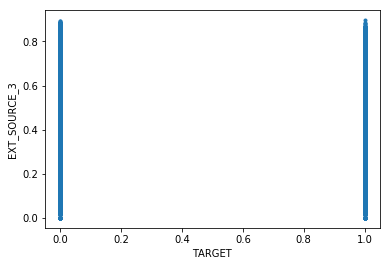

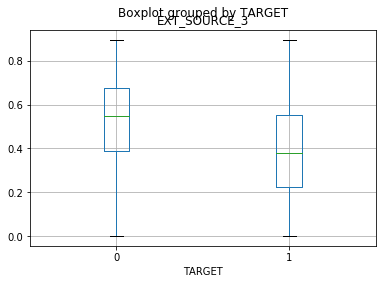

In [45]:
plt.plot(app_train['TARGET'], app_train['EXT_SOURCE_3'], '.')
plt.xlabel('TARGET')
plt.ylabel('EXT_SOURCE_3')
plt.show()

app_train.boxplot(column='EXT_SOURCE_3', by='TARGET')

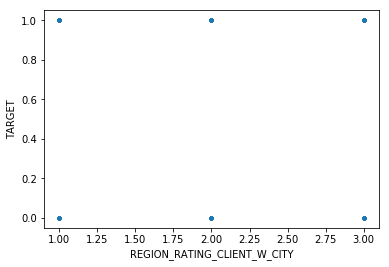

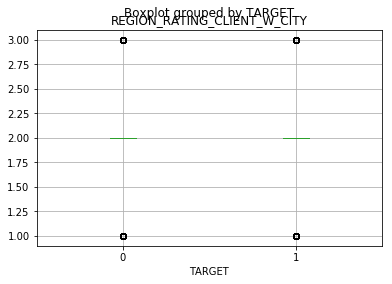

In [47]:
plt.plot(app_train['REGION_RATING_CLIENT_W_CITY'], app_train['TARGET'], '.')
plt.ylabel('TARGET')
plt.xlabel('REGION_RATING_CLIENT_W_CITY')
plt.show()

app_train.boxplot(column='REGION_RATING_CLIENT_W_CITY', by='TARGET')

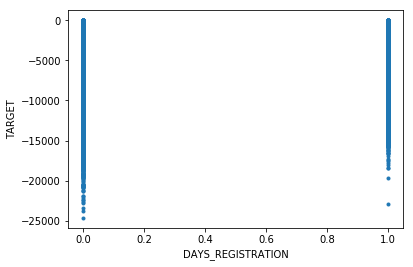

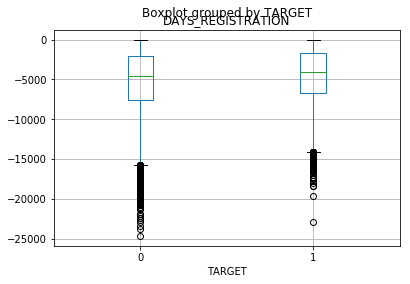

In [48]:
plt.plot(app_train['TARGET'], app_train['DAYS_REGISTRATION'], '.')
plt.ylabel('TARGET')
plt.xlabel('DAYS_REGISTRATION')
plt.show()

app_train.boxplot(column='DAYS_REGISTRATION', by='TARGET')